# Question 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as slg

In [2]:
data_time = pd.read_csv("delivery_time.csv")
data_time

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
data_time.columns = ["Delivery_Time","Sorting_Time"]
data_time

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data_time.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


##   Different exploratory plots 

E:\ProgramData\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

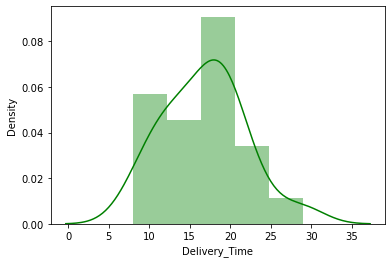

In [6]:
sns.distplot(data_time["Delivery_Time"], color="green")

E:\ProgramData\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

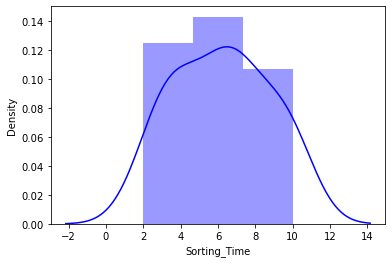

In [7]:
sns.distplot(data_time["Sorting_Time"],color="blue")

{'whiskers': [<matplotlib.lines.Line2D at 0xa70eb19cd0>,
 'caps': [<matplotlib.lines.Line2D at 0xa70eb19040>,
 'boxes': [<matplotlib.lines.Line2D at 0xa70eb19be0>,
 'medians': [<matplotlib.lines.Line2D at 0xa70eb09e20>,
 'fliers': [<matplotlib.lines.Line2D at 0xa70eb09a30>,
 'means': []}

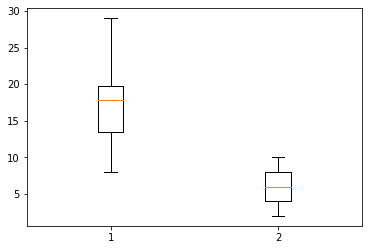

In [9]:
plt.boxplot(data_time)

Text(0, 0.5, 'Delivery Time')

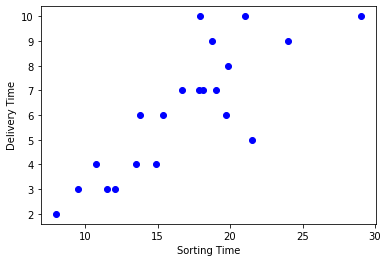

In [10]:
plt.plot(data_time.Delivery_Time,data_time.Sorting_Time,"bo")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

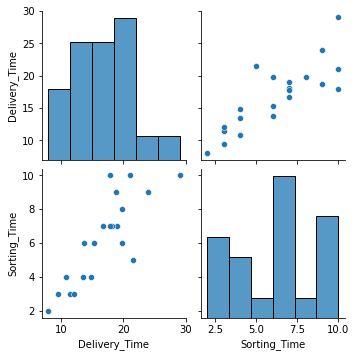

In [11]:
sns.pairplot(data_time)

###   Correlation coefficient value for delivery time and sorting time 

In [12]:
data_time.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


## Simple linear regression model 

In [13]:
model_1 = slg.ols("Delivery_Time~Sorting_Time",data=data_time).fit()

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

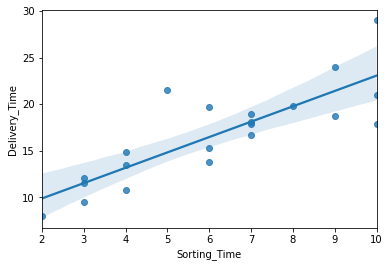

In [14]:
sns.regplot(x="Sorting_Time", y="Delivery_Time", data=data_time)

In [15]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           3.98e-06
Time:                        18:36:43   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###   Hence the P-value is less than 0.05. So X varibale is significant and also Multiple R-Square value is 0.682. That’s mean this model will predict the output 68.2% time correct

In [16]:
Predict_1 = model_1.predict(data_time.iloc[:,1])
Predict_1

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [17]:
root_mean_square_error_1 =  np.sqrt(np.mean((np.array(data_time['Delivery_Time'])-np.array(Predict_1))**2))
root_mean_square_error_1

2.7916503270617654

Text(0, 0.5, 'Delivery Time')

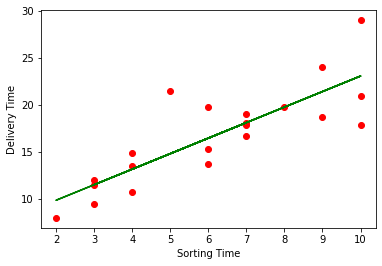

In [18]:
plt.scatter(x=data_time['Sorting_Time'],y=data_time['Delivery_Time'],color='red')
plt.plot(data_time['Sorting_Time'],Predict_1 ,color='green')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

##  Second linear regression model  using logarithmetic 

###  Taking log of predictor variable 

In [19]:
model_2 = slg.ols('Delivery_Time~np.log(Sorting_Time)',data=data_time).fit()

In [20]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           2.64e-06
Time:                        18:37:35   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
Predict_2 = model_2.predict(pd.DataFrame(data_time['Sorting_Time'])) 
Predict_2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [22]:
root_mean_square_error_2 = np.sqrt(np.mean((np.array(data_time['Delivery_Time'])-np.array(Predict_2))**2))
root_mean_square_error_2

2.733171476682066

In [23]:
Predict_2.corr(data_time.Delivery_Time)

0.8339325279256244

Text(0, 0.5, 'Delivery Time')

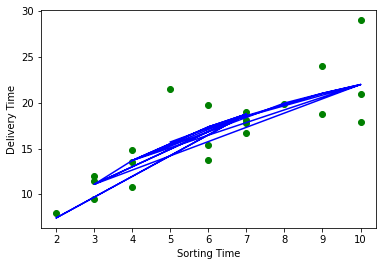

In [24]:
plt.scatter(x=data_time['Sorting_Time'],y=data_time['Delivery_Time'],color='green')
plt.plot(data_time['Sorting_Time'], Predict_2, color='blue')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

##   Third linear regression model 

###  Taking log of the response variable 

In [25]:
model_3 = slg.ols('np.log(Delivery_Time)~Sorting_Time',data=data_time).fit()

In [26]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sun, 28 Mar 2021   Prob (F-statistic):           1.59e-06
Time:                           18:38:15   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
Predict_3_log =  model_3.predict(pd.DataFrame(data_time['Sorting_Time'])) 
Predict_3_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [28]:
Predict_3=np.exp(Predict_3_log)
Predict_3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [29]:
root_mean_square_error_3 = np.sqrt(np.mean((np.array(data_time['Delivery_Time'])-np.array(Predict_3))**2))
root_mean_square_error_3

2.940250323056201

In [30]:
Predict_3.corr(data_time.Delivery_Time)

0.8085780108289262

Text(0, 0.5, 'Delivery Time')

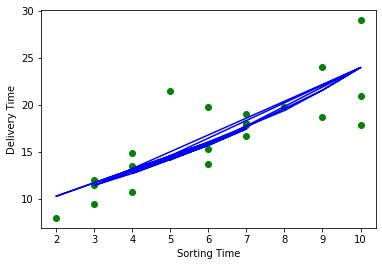

In [31]:
plt.scatter(x=data_time['Sorting_Time'],y=data_time['Delivery_Time'],color='green')
plt.plot(data_time['Sorting_Time'], Predict_3, color='blue')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

##  Fourth linear regression model 

###   Taking log of both response and predictor variable 

In [32]:
model_4 = slg.ols("np.log(Delivery_Time)~np.log(Sorting_Time)",data=data_time).fit()

In [33]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 28 Mar 2021   Prob (F-statistic):           1.60e-07
Time:                           18:39:16   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
Predict_4_log = model_4.predict(pd.DataFrame(data_time["Sorting_Time"]))
Predict_4_log

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [35]:
Predict_4 = np.exp(Predict_4_log)
Predict_4

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

In [36]:
root_mean_square_error_4 = np.sqrt(np.mean((np.array(data_time['Delivery_Time'])-np.array(Predict_4))**2))
root_mean_square_error_4

2.7458288976145497

In [37]:
Predict_4.corr(data_time.Delivery_Time)

0.8331464716437293

Text(0, 0.5, 'Delivery Time')

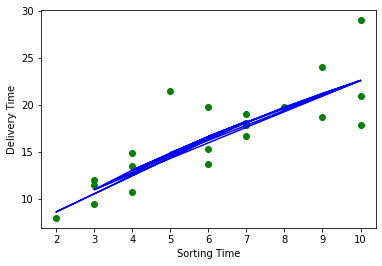

In [38]:
plt.scatter(x=data_time['Sorting_Time'],y=data_time['Delivery_Time'],color='green')
plt.plot(data_time['Sorting_Time'], Predict_4, color='blue')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

###   Hence the P-value is less than 0.05. So X varibale is significant and also Multiple R-Square value is 0.772. That’s mean this model will predict the output 77.2% time correct. so this model is better than the above considered models 

In [39]:
data = {"MODEL":pd.Series(["root_mean_square_error_1","root_mean_square_error_2","root_mean_square_error_3","root_mean_square_error_4"]),
        "RMSE_Values":pd.Series([root_mean_square_error_1,root_mean_square_error_2,root_mean_square_error_3,root_mean_square_error_4]),
        "Rsquare":pd.Series([model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,root_mean_square_error_1,2.791650,0.682271
1,root_mean_square_error_2,2.733171,0.695443
2,root_mean_square_error_3,2.940250,0.710948
3,root_mean_square_error_4,2.745829,0.772161
